In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import math
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
# tracks information

storms_start_end_path = 'storms_start_end.csv'

storms_start_end = pd.read_csv(storms_start_end_path)

tracks_path_local_mac = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/storms_dates.txt'

tracks = pd.read_csv(tracks_path_local_mac, sep='\t', header=None)
tracks = tracks.drop([0])
# name each column of the tracks dataframe

tracks.columns = ['year', 'monthdayhour', 'month', 'day', 'event','lon', 'lat', 'total_storms', 'long_dates']

In [9]:
lon_list = []
lat_list = []

for i in range(len(storms_start_end)):
    start_date = storms_start_end['start_date'][i]
    end_date = storms_start_end['end_date'][i]

    # Find the index of the start and end dates in the tracks DataFrame
    start_index = tracks.index[(tracks['long_dates'] == start_date) & (tracks['event'] == 'FAUX')].tolist()
    #end_index = tracks.index[(tracks['long_dates'] == end_date) & (tracks['event'].shift(+1) != 'FAUX')].tolist()
    end_index = tracks.index[(tracks['long_dates'] == end_date) & (tracks['event'] == 'FIN')].tolist()

    if start_index and end_index:
        # Extract lon and lat for the storm using the found indices
        lon_i = tracks['lon'].iloc[start_index[0]:end_index[0] + 1].to_numpy()
        lat_i = tracks['lat'].iloc[start_index[0]:end_index[0] + 1].to_numpy()

        # Convert lon and lat values to floats and replace commas with dots
        lonx_i = [float(obj.replace(',', '.')) for obj in lon_i]
        latx_i = [float(obj.replace(',', '.')) for obj in lat_i]

        # Append lon and lat values to the lists
        lon_list.append(lonx_i)
        lat_list.append(latx_i)

# Access the stored values
for j in range(len(lon_list)):
    lon_variable_name = f'lon_{j + 1}'
    lat_variable_name = f'lat_{j + 1}'

    lon_value = lon_list[j]
    lat_value = lat_list[j]

    # Print or use the stored values as needed
    print(lon_variable_name, lon_value)
    print(lat_variable_name, lat_value)
    print("\n")


lon_1 [293.195404, 297.022125, 300.948608, 304.610657, 308.032532, 311.525208, 315.441956, 319.424652, 323.65451, 328.385986, 333.983643, 338.550537, 342.319214, 345.381348, 347.481354, 348.955505, 349.642426, 349.693695, 349.61145, 349.085846, 347.966858, 346.738892, 345.792297, 344.685577, 343.98587, 343.616211, 343.573486, 343.444611, 343.254211, 342.67276, 342.009674, 340.333374, 338.16507, 337.026581, 336.486816, 336.641907, 337.001831, 337.352783, 337.849609, 338.004578, 338.662262, 339.791138, 341.671143, 343.122467, 343.889618, 344.765076, 345.477539, 346.371155, 350.525635, 350.603516, 352.2258, 351.652893, 352.075134, 352.486237, 352.718658, 352.459442, 352.344513, 352.226166, 352.522858, 352.417542, 353.478241, 305.020905]
lat_1 [41.979839, 42.648212, 43.774544, 45.219181, 46.44455, 47.063492, 48.108612, 48.939552, 49.740711, 50.742744, 52.367657, 54.163193, 56.081779, 57.61256, 59.430359, 60.906483, 62.511345, 63.578465, 64.648735, 65.384789, 65.905014, 66.140305, 65.988884

In [9]:
# plotting each tracks
for i in range(len(lon_list)):
    fig, ax = plt.subplots()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 90)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Storm {i + 1} - Date: {storms_start_end.iloc[i]["start_date"]}')

    # Initialize an empty scatter plot for the animation
    scatter = ax.scatter([], [], color='red', s=10)

    # Function to update the scatter plot in each frame of the animation
    def update(frame):
        scatter.set_offsets(list(zip(lon_list[i][:frame + 1], lat_list[i][:frame + 1])))

    # Create the animation
    animation = FuncAnimation(fig, update, frames=len(lon_list[i]), interval=200, blit=False)

    # Save each animation as a separate GIF
    animation_file = f'storm_{i + 1}_animation_v2.gif'
    animation.save(animation_file, writer='pillow')
    print(f"Saved animation: {animation_file}")

    # Close the figure to free up resources
    plt.close(fig)

# Show the animations (optional)
plt.show()

Saved animation: storm_1_animation.gif
Saved animation: storm_2_animation.gif
Saved animation: storm_3_animation.gif
Saved animation: storm_4_animation.gif
Saved animation: storm_5_animation.gif
Saved animation: storm_6_animation.gif
Saved animation: storm_7_animation.gif
Saved animation: storm_8_animation.gif
Saved animation: storm_9_animation.gif
Saved animation: storm_10_animation.gif
Saved animation: storm_11_animation.gif
Saved animation: storm_12_animation.gif
Saved animation: storm_13_animation.gif
Saved animation: storm_14_animation.gif
Saved animation: storm_15_animation.gif
Saved animation: storm_16_animation.gif
Saved animation: storm_17_animation.gif
Saved animation: storm_18_animation.gif
Saved animation: storm_19_animation.gif
Saved animation: storm_20_animation.gif
Saved animation: storm_21_animation.gif
Saved animation: storm_22_animation.gif
Saved animation: storm_23_animation.gif
Saved animation: storm_24_animation.gif
Saved animation: storm_25_animation.gif
Saved ani

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_16685/2795664536.py:105: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)


KeyboardInterrupt: 

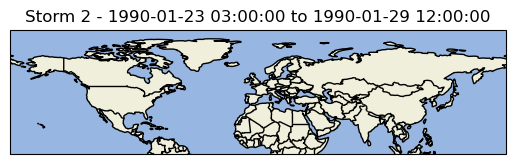

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Function to plot storm for a specific timestep
def plot_storm(ax, lon_east, lon_west, lat_south, lat_north):
    lon_east = float(lon_east)
    lon_west = float(lon_west)
    lat_south = float(lat_south)
    lat_north = float(lat_north)
    ax.add_patch(patches.Rectangle((lon_west, lat_south), lon_east - lon_west, lat_north - lat_south, linewidth=1, edgecolor='r', facecolor='none'))

# Read storm start and end dates
storm_dates = pd.read_csv("storms_start_end.csv", parse_dates=['start_date', 'end_date'])

# Loop through each storm file
for i in range(1, 97):
    storm_data = pd.read_csv(f"/Users/fabienaugsburger/Documents/GitHub/master-project/tracks_square_storm/tc_irad_tracks/tc_1_hour/tc_irad_{1}_interp.txt", header=None, names=['lon_east', 'lon_west', 'lat_south', 'lat_north'])
    storm_data = storm_data.drop([0])

    # Create a list of storm frames
    storm_frames = []
    
    # Loop through each timestep of the storm
    '''   for index, row in storm_data.iterrows():
        fig, ax = plt.subplots()
        plot_storm(ax, row['lon_east'], row['lon_west'], row['lat_south'], row['lat_north'])
        
        # Get the corresponding storm start and end date
        storm_start_date = storm_dates.iloc[i-1]['start_date']
        storm_end_date = storm_dates.iloc[i-1]['end_date']
        
        # Set title with storm start and end dates
        ax.set_title(f"Storm {i} - {storm_start_date} to {storm_end_date}")
        
        # Save the plot as an image
        plt.savefig(f"storm_{i}_frame_{index}.png")
        plt.close()
        
        # Append the image to the list of frames
        storm_frames.append(f"storm_{i}_frame_{index}.png")'''
    
    '''# Loop through each timestep of the storm
        for index, row in storm_data.iterrows():
        fig, ax = plt.subplots()
        
        # Plot storm rectangle
        plot_storm(ax, row['lon_east'], row['lon_west'], row['lat_south'], row['lat_north'])
        
        # Get the corresponding storm start and end date
        storm_start_date = storm_dates.iloc[i-1]['start_date']
        storm_end_date = storm_dates.iloc[i-1]['end_date']
        
        # Set title with storm start and end dates
        ax.set_title(f"Storm {i} - {storm_start_date} to {storm_end_date}")
        
        # Save the plot as an image
        plt.savefig(f"storm_{i}_frame_{index}.png")
        plt.close()
        
        # Append the image to the list of frames
        storm_frames.append(f"storm_{i}_frame_{index}.png")'''

    # Loop through each timestep of the storm
    for index, row in storm_data.iterrows():
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
        
        # Add basemap features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)
        
        # Plot storm rectangle
        plot_storm(ax, row['lon_east'], row['lon_west'], row['lat_south'], row['lat_north'])
        
        # Get the corresponding storm start and end date
        storm_start_date = storm_dates.iloc[i-1]['start_date']
        storm_end_date = storm_dates.iloc[i-1]['end_date']
        
        # Set title with storm start and end dates
        ax.set_title(f"Storm {i} - {storm_start_date} to {storm_end_date}")
        
        # Set x and y limits
        ax.set_xlim(-180, 180)
        ax.set_ylim(0, 90)
        
        # Set labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        
        # Save the plot as an image
        plt.savefig(f"storm_{i}_frame_{index}.png")
        plt.close()
        
        # Append the image to the list of frames
        storm_frames.append(f"storm_{i}_frame_{index}.png")
    
    # Create gif from frames
    with imageio.get_writer(f"test_gif/storm_{i}_animation.gif", mode='I') as writer:
        for frame in storm_frames:
            image = imageio.imread(frame)
            writer.append_data(image)

TypeError: unsupported operand type(s) for -: 'str' and 'str'